In [2]:
#Import LIBRARIES
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply( lambda x: ast.literal_eval(x) if pd.notna(x) else x)

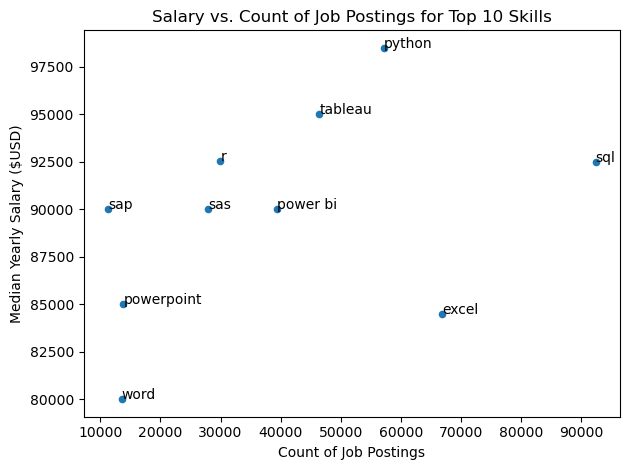

In [4]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_exploded = df_DA.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
    
)

skill_stats= skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()



for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)


plt.show()

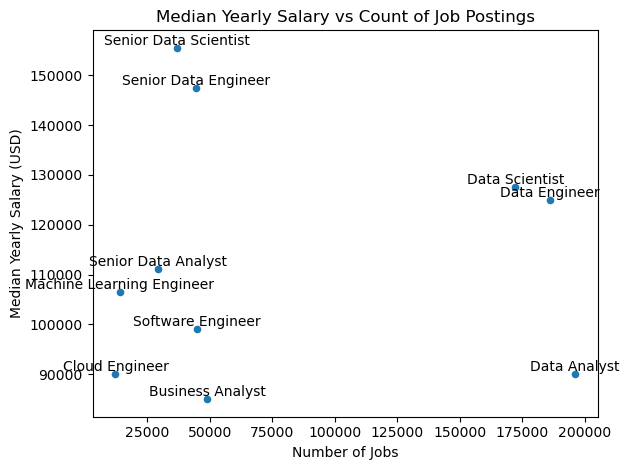

In [147]:
df_title_salary = df.groupby('job_title_short').agg(
    
    job_title_count = ('job_title_short', 'count'),
    median_salary = ('salary_year_avg', 'median')
    
)
df_title_salary.plot(kind='scatter', x='job_title_count', y='median_salary')

for i, txt in enumerate(df_title_salary.index):
    
    plt.text(df_title_salary['job_title_count'].iloc[i], df_title_salary['median_salary'].iloc[i], txt,  ha='center', va='bottom')

plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')
plt.tight_layout()
plt.show()

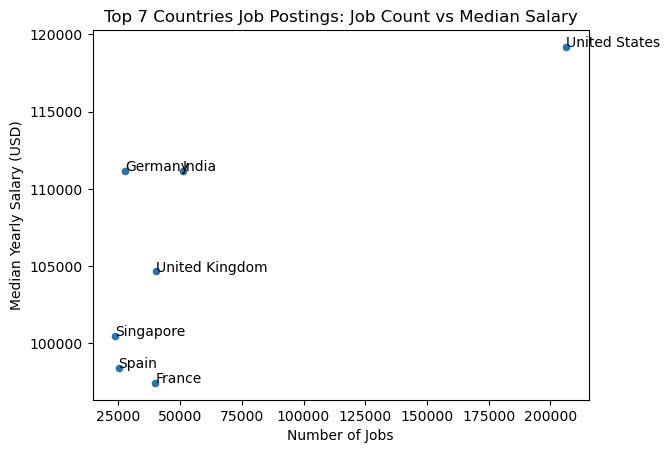

In [148]:

df_contry_stats = df.groupby('job_country').agg(
    
    country_count = ('job_country', 'count'),
    median_salary = ('salary_year_avg', 'median')
    
).dropna()

df_countries = df_contry_stats.sort_values(by='country_count', ascending=False).head(7)

df_countries.plot(kind='scatter', x= 'country_count', y='median_salary')


plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')


for i, txt in enumerate(df_countries.index):
    
    plt.text(df_countries['country_count'].iloc[i],df_countries['median_salary'].iloc[i], txt)

plt.show()

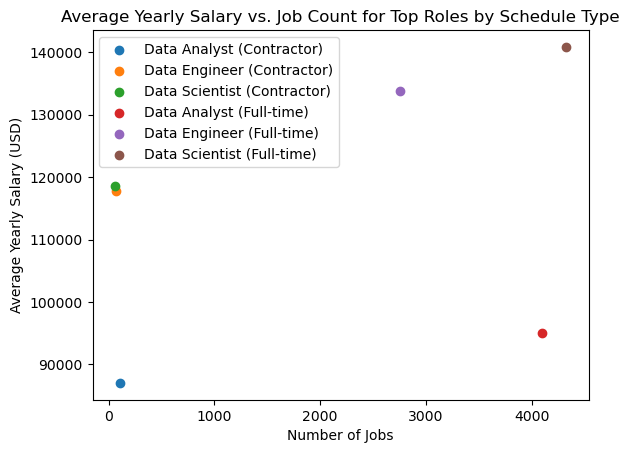

In [159]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_filt = df[       
    (df['job_title_short'].isin(target_job_titles)) &
    (df['job_country'] == 'United States') &
    (df['job_schedule_type'].isin(['Full-time', 'Contractor']))
].dropna(subset='salary_year_avg')

# Agrupación y agregación
stats = df_filt.groupby(['job_schedule_type', 'job_title_short']).agg(
    job_count=('job_title_short', 'count'),
    mean_salary=('salary_year_avg', 'mean')
).dropna()

stats.reset_index(inplace=True)

# Crear la columna 'job_title_type' en 'stats'
stats['job_title_type'] = stats['job_title_short'] + ' (' + stats['job_schedule_type'] + ')'

# Graficar usando plt.scatter()
for job_title_type in stats['job_title_type'].unique():
    subset = stats[stats['job_title_type'] == job_title_type]
    plt.scatter(subset['job_count'], subset['mean_salary'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()



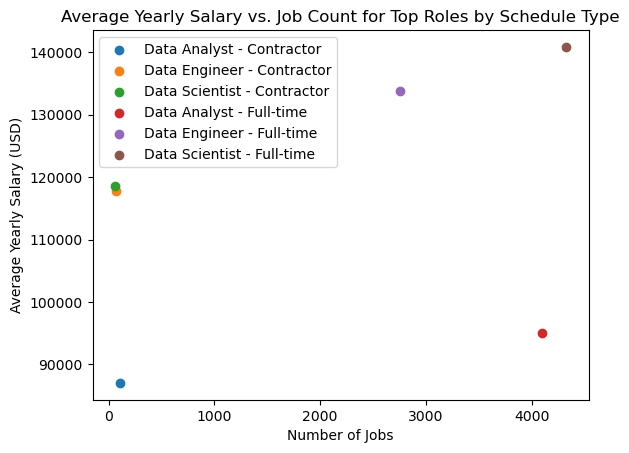

In [158]:
# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
 (df['job_country'] == 'United States') &
 (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
 (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
 mean_salary_year_avg=('salary_year_avg', 'mean'),
 job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
 subset = stats[stats['job_title_type'] == job_title_type]
 plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()


In [228]:


#table = df_CA.pivot_table(values='salary_year_avg',index='job_location', columns='job_skills', aggfunc='mean').fillna(0)





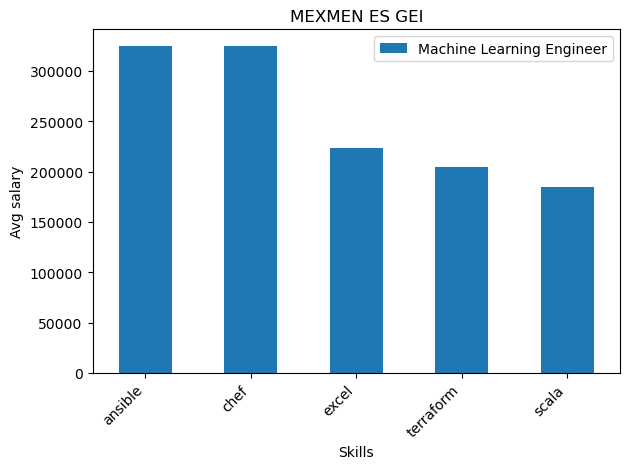

,job_skills,median_salary
1,ansible,325000.000000
8,chef,325000.000000
12,excel,223000.000000
45,terraform,205000.000000
35,scala,184583.333333


In [258]:
df_exploded = df.explode('job_skills')

df_CO = df_exploded[
    
    (df_exploded['job_title_short']=='Machine Learning Engineer') & 
    (df_exploded['job_country'] == 'Canada')]

adas

# df_ca.plot(kind='bar', x='job_skills', y='median_salary', label='Machine Learning Engineer')

# plt.title('MEXMEN ES GEI')
# plt.ylabel('Avg salary')
# plt.xlabel('Skills')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.legend()
# plt.show()

# df_ca

In [1]:
job_title = 'Cloud Engineer'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)
df_skill_final.plot(kind='bar', x='job_skills', y='Skill_count')


plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel(' ')
plt.legend().set_visible(False)
plt.show()

NameError: name 'df_skills_count' is not defined

In [255]:
df_mexmen = df.copy()


df_mexmen_US = df_mexmen[df_mexmen['job_country']=='United States']

df_mexmen_US = df_mexmen_US.explode('job_skills')

stats = df_mexmen_US.groupby('job_skills')['salary_year_avg'].size().reset_index().dropna()

stats.sort_values(by='salary_year_avg', ascending=False)

,job_skills,salary_year_avg
195,sql,115048
160,python,107176
164,r,51253
208,tableau,49596
60,excel,45398
...,...,...
125,msaccess,1
65,fedora,1
24,capacitor,1
64,fastify,1
